In [1]:
# import the relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Preprocessing the data

### Training dataset

In [2]:
# load the dataset
train_data = pd.read_csv("Census_income_train.csv")

In [3]:
# inspect the dataset
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
len(train_data)

32560

In [5]:
# No null or NaN values
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

#### Removing rows with unknown values ('?')

In [6]:
# All missing or unknow values, however, are marked with a question mark (?)
# There are 3 columns which contain '?' - Workclass, Occupation, Native-country

In [7]:
# Let's start with the Workclass column
# We can obtain a list of boolean values indicating whether there is a '?' on the current row
train_data["Workclass"].str.contains("\?")

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [8]:
# Let's reverse all the boolean values
train_data["Workclass"].str.contains("\?") == False

0        True
1        True
2        True
3        True
4        True
         ... 
32555    True
32556    True
32557    True
32558    True
32559    True
Name: Workclass, Length: 32560, dtype: bool

In [9]:
# Take the subset of the dataframe rows which don't contain '?'
clean_train_data = train_data[train_data["Workclass"].str.contains("\?") == False]

In [10]:
len(clean_train_data)

30724

In [11]:
# Let's do the same for 'Occupation'
clean_train_data = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]

In [12]:
len(clean_train_data)

30717

In [13]:
# And for 'Native-country'
clean_train_data = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]

In [14]:
len(clean_train_data)

30161

In [15]:
# Finally, let's reset the index
clean_train_data = clean_train_data.reset_index(drop=True)

# Data Visualization

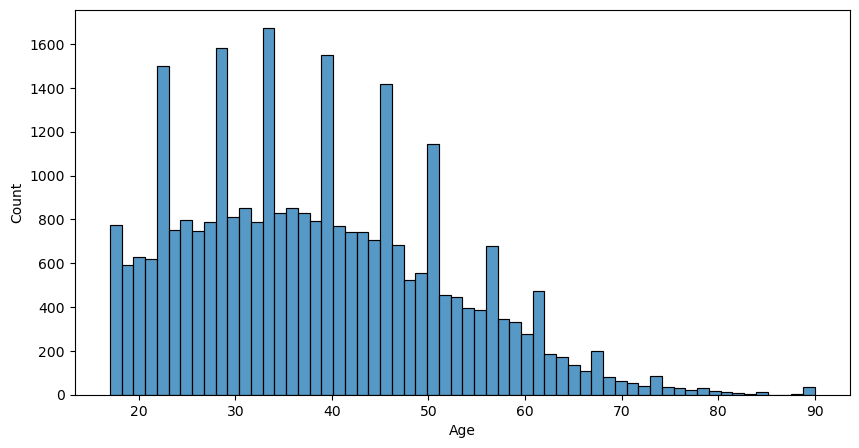

In [16]:
plt.figure(figsize = (10,5))
sns.histplot(x = clean_train_data["Age"])
plt.show()

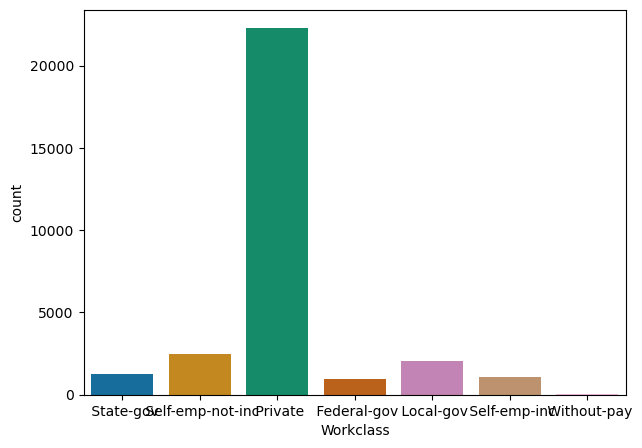

In [17]:
plt.figure(figsize = (7,5))
sns.countplot(x = clean_train_data["Workclass"], palette = 'colorblind')
plt.xticks(rotation=0)
plt.show()

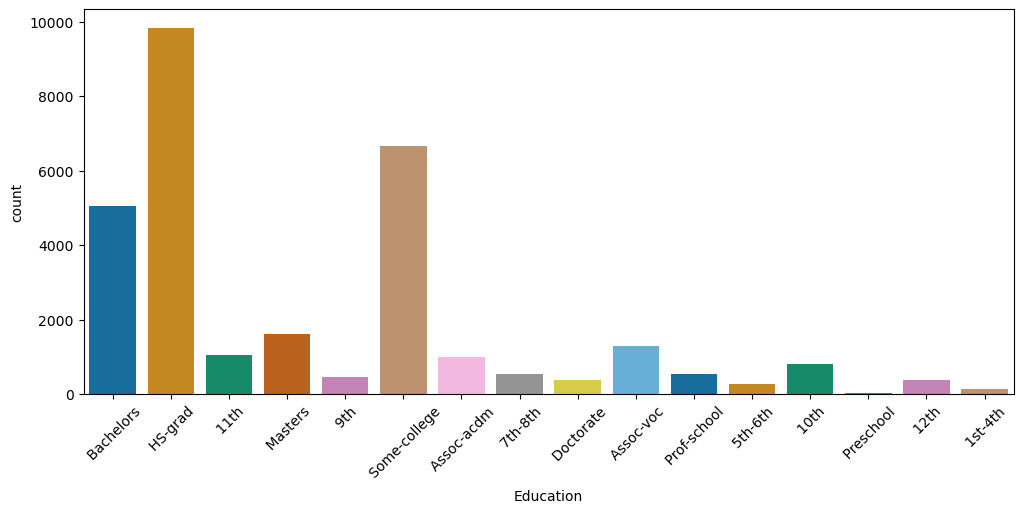

In [18]:
plt.figure(figsize = (12,5))
sns.countplot(x = clean_train_data["Education"], palette = 'colorblind')
plt.xticks(rotation = 45)
plt.show()

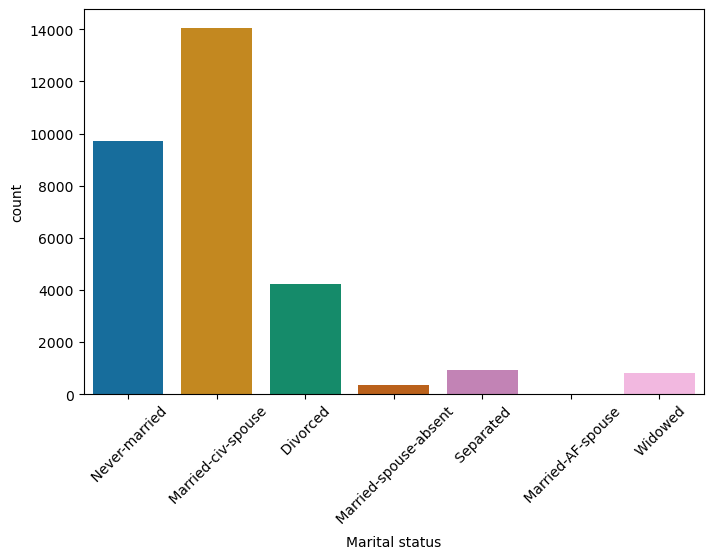

In [19]:
plt.figure(figsize = (8,5))
sns.countplot(x = clean_train_data["Marital status"], palette = 'colorblind')
plt.xticks(rotation = 45)
plt.show()

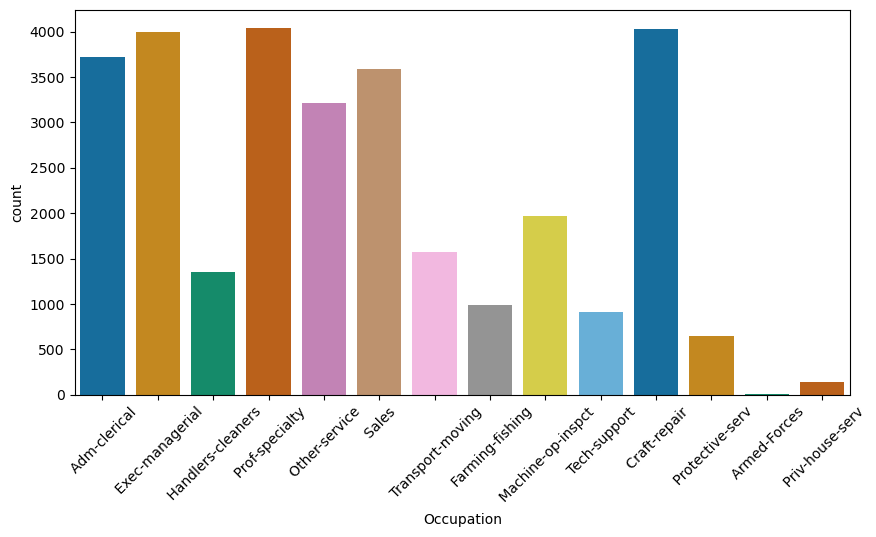

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(x = clean_train_data["Occupation"], palette = 'colorblind')
plt.xticks(rotation = 45)
plt.show()

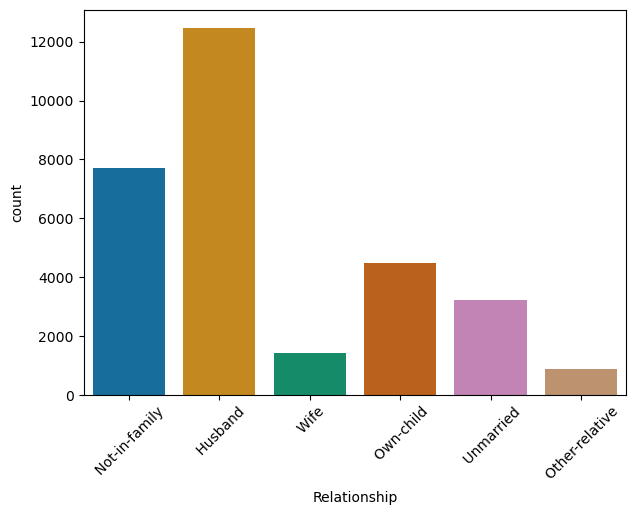

In [21]:
plt.figure(figsize = (7,5))
sns.countplot(x = clean_train_data["Relationship"], palette = 'colorblind')
plt.xticks(rotation = 45)
plt.show()

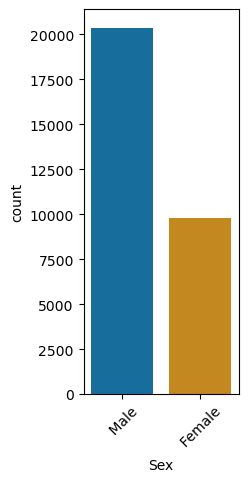

In [22]:
plt.figure(figsize = (2,5))
sns.countplot(x = clean_train_data["Sex"], palette = 'colorblind')
plt.xticks(rotation = 45)
plt.show()

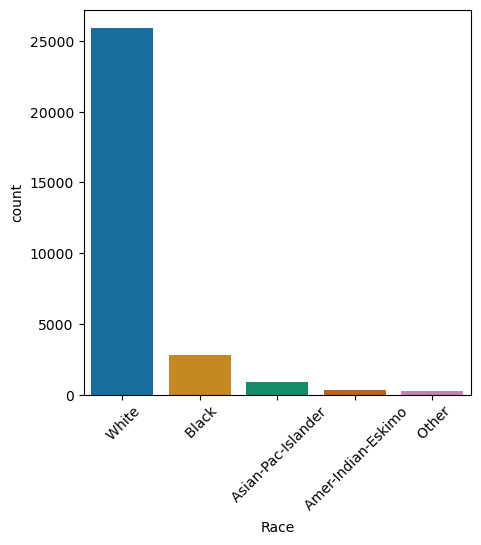

In [23]:
plt.figure(figsize = (5,5))
sns.countplot(x = clean_train_data["Race"], palette = 'colorblind')
plt.xticks(rotation = 45)
plt.show()

#### Creating dummy variables and separating inputs and targets

In [24]:
# In the original data, there are both categorical and numerical data
# Decision trees and random forest can work with categorical data in general
# However, this is not implemented in sklearn
# So, we need to convert the categorical data to numerical
# We will do that with one hot encoding

In [25]:
# Pandas can automatically do that for us with '.get_dummies'
train_dummies = pd.get_dummies(clean_train_data, drop_first=False)

In [26]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
# The last 2 columns are whether the income <= 50k and whether it is >50k
# Both of these carry the same information, so we will remove one of them
train_dummies = train_dummies.drop(['Income_ <=50K'],axis=1)

In [28]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# The input features are everything besides the last column
train_input = train_dummies.iloc[:,:-1]

# The target/output is just the last column
train_target = train_dummies.iloc[:,-1]

In [30]:
train_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
train_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Income_ >50K, dtype: uint8

### Test dataset

In [32]:
# Let's do the same preprocessing on the test dataset

In [33]:
# Load test data
test_data = pd.read_csv("Census_income_test.csv")

In [34]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [35]:
len(test_data)

16281

#### Cleaning unknown ('?') values

In [36]:
clean_test_data = test_data[test_data["Workclass"].str.contains("\?") == False]

In [37]:
len(clean_test_data)

15318

In [38]:
clean_test_data = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]

In [39]:
len(clean_test_data)

15315

In [40]:
clean_test_data = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]

In [41]:
len(clean_test_data)

15060

In [42]:
clean_test_data = clean_test_data.reset_index(drop=True)

#### Creating dummy variables and sepratting inputs and targets

In [43]:
test_dummies = pd.get_dummies(clean_test_data, drop_first=False)

In [44]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [45]:
test_dummies = test_dummies.drop(['Income_ <=50K.'],axis=1)

In [46]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
test_input = test_dummies.iloc[:,:-1]
test_target = test_dummies.iloc[:,-1]

In [48]:
test_target.head()

0    0
1    0
2    1
3    1
4    0
Name: Income_ >50K., dtype: uint8

## Training the Decision tree model & Visulaizing the tree

In [49]:
# Define the model as a decision tree classifier
clf = DecisionTreeClassifier()

In [50]:
# Train the model
clf.fit(train_input,train_target)

DecisionTreeClassifier()

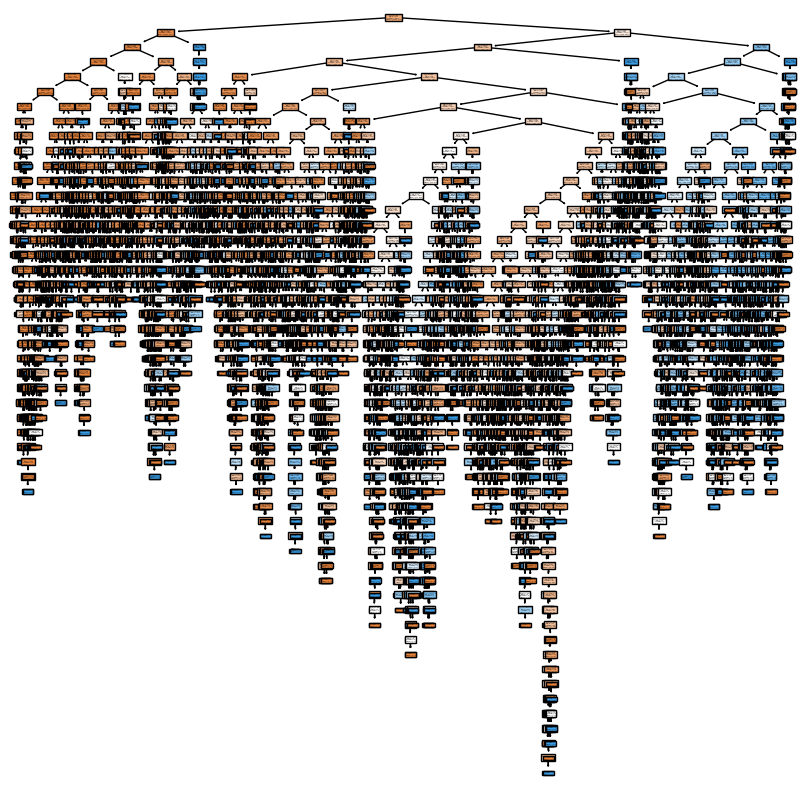

In [51]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True)
plt.show()

# NOTE: It may take a lot of time (~3 min) untill the whole tree is drawn


- This picture is very complicated indicating a tree with enormous proportions
- This indicates a high probability that the model has overfitted

## Testing the model

In [52]:
# get the predictions based on the test inputs
clf_pred = clf.predict(test_input)

In [53]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, clf_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11360
           1       0.60      0.62      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060



## Create the tree with pruning

In [54]:
# Define the model as a decision tree classifier with pruning in order to avoid overfitting
# The value of 0.001 for the pruning seems like a good spot for this particular model
clf = tree.DecisionTreeClassifier(ccp_alpha=0.001)

In [55]:
# Train the tree
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

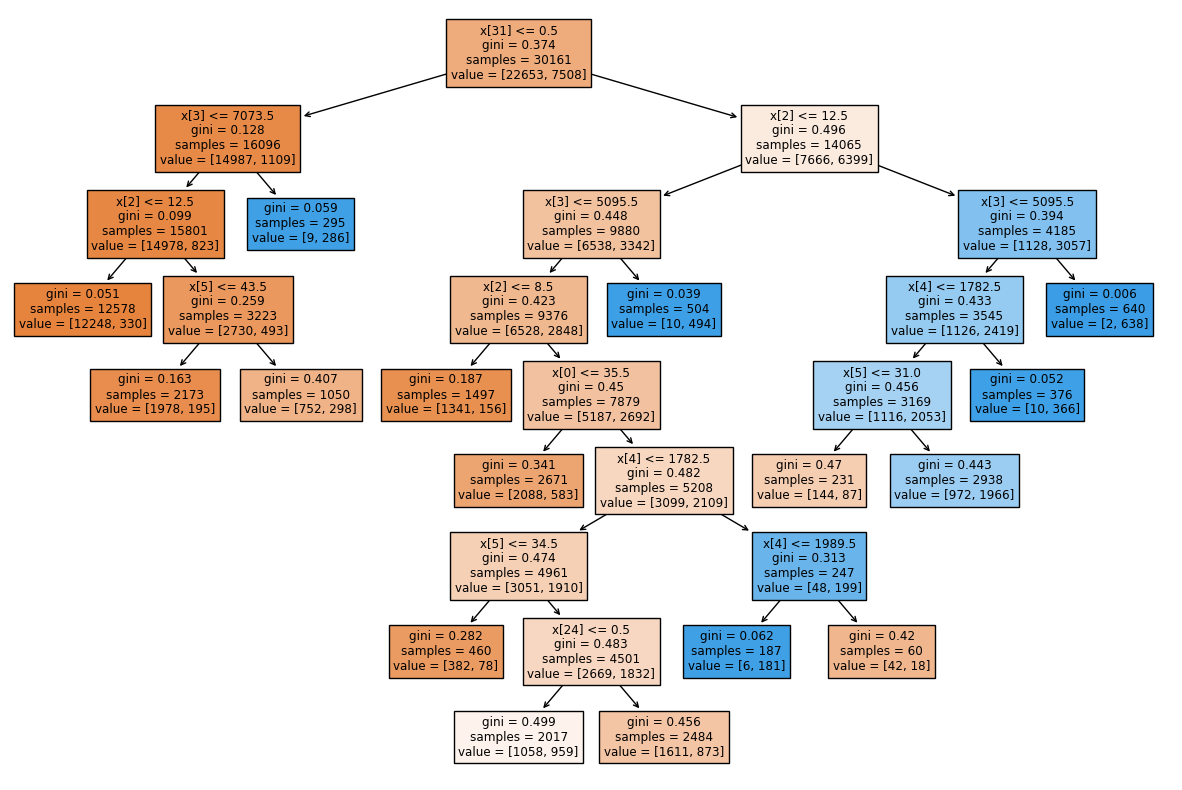

In [56]:
# Plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()


- This time, the tree appears more manageable
- Pruning helped in addressing the issue of overfitting.

### Testing the pruned model

In [57]:
# get the predictions based on the test inputs
dt_pred = clf.predict(test_input)

In [58]:
# print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



In [59]:
# The accuracy jumped from 80% to 85% after pruning
# This confirms our suspicions that the first tree has overfitted

## Creating and training the Random forest model

In [60]:
# Initialize the model as a random forest classifier
rf = RandomForestClassifier()

In [61]:
# Train the model
rf.fit(train_input,train_target)

RandomForestClassifier()

### Testing the model

In [62]:
# Obtain the model's predictions on the test dataset
test_pred = clf.predict(test_input)

In [63]:
# Print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



### Creating and training the model with increasing the no. of trees to 150

In [64]:
# Initialize the model as a random forest classifier with 150 trees (default is 100 trees)
clf = RandomForestClassifier(n_estimators = 150)

In [65]:
# Train the model
clf.fit(train_input,train_target)

RandomForestClassifier(n_estimators=150)

#### Testing the model

In [66]:
# Obtain the model's predictions on the test dataset
test_pred = clf.predict(test_input)

In [67]:
# Print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [68]:
# The result is basically the same as before, so the additional trees didn't help at all

### Creating and training the model with pruning

In [69]:
# Initialize the model as a random forest classifier with pruning
clf = RandomForestClassifier(ccp_alpha = 0.0001)

In [70]:
# Train the model
clf.fit(train_input,train_target)

RandomForestClassifier(ccp_alpha=0.0001)

### Testing the model

In [71]:
# Obtain the model's predictions on the test dataset
test_pred = clf.predict(test_input)

In [72]:
# Print the metrics obtained from the real targets and our model's predictions
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.78      0.61      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060



# Conclusion

- A slight increase in accuracy (i.e 1%) is achieved with random forest model, however it is insignificant
- This is the limit of the performance on this dataset
- Pruning technique worked well in both the models
- Considering the robustness & accuracy of all the models, the Decision tree with pruning is the best fit model for this dataset 